In [16]:
from PIL import Image
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import skimage.feature
import scipy.signal
import math
import os

In [25]:
images = []
files= []
images_dotted = []
files_dotted = []
ids = []
train_files_path = os.path.join('TrainSmall2', 'Train', '*.jpg')
dotted_train_files_path = os.path.join('TrainSmall2','TrainDotted','*.jpg')
labels_path = os.path.join('TrainSmall2','Train','train.csv')

for filename in glob.glob(train_files_path):
    print(filename)
    ids.append(int(filename.split('\\')[-1][:-4]))
    im = Image.open(filename)
    images.append(im)
    files.append(filename)
for filename in glob.glob(dotted_train_files_path):
    print(filename)
    im = Image.open(filename)
    images_dotted.append(im)
    files_dotted.append(filename)
labels = pd.read_csv(labels_path,index_col=0)

TrainSmall2\Train\41.jpg
TrainSmall2\Train\42.jpg
TrainSmall2\Train\43.jpg
TrainSmall2\Train\44.jpg
TrainSmall2\Train\45.jpg
TrainSmall2\Train\46.jpg
TrainSmall2\Train\47.jpg
TrainSmall2\Train\48.jpg
TrainSmall2\Train\49.jpg
TrainSmall2\Train\50.jpg
TrainSmall2\TrainDotted\41.jpg
TrainSmall2\TrainDotted\42.jpg
TrainSmall2\TrainDotted\43.jpg
TrainSmall2\TrainDotted\44.jpg
TrainSmall2\TrainDotted\45.jpg
TrainSmall2\TrainDotted\46.jpg
TrainSmall2\TrainDotted\47.jpg
TrainSmall2\TrainDotted\48.jpg
TrainSmall2\TrainDotted\49.jpg
TrainSmall2\TrainDotted\50.jpg


In [18]:
coords = pd.read_csv('coords.csv')

In [7]:
coords

,tid,cls,row,col
0,0,0,106,4835
1,0,0,309,2609
2,0,0,412,2891
3,0,0,431,1823
4,0,0,449,3309
5,0,0,472,4105
6,0,0,603,2727
7,0,0,805,1873
8,0,0,855,2146
9,0,0,974,4366


In [19]:
coords[coords['tid']==41]

,tid,cls,row,col
2740,41,0,992,3218
2741,41,0,1237,3487
2742,41,0,1246,3058
2743,41,0,1329,3429
2744,41,0,1544,3106
2745,41,0,1577,2740
2746,41,0,1638,3360
2747,41,0,1815,3314
2748,41,0,1836,2914
2749,41,0,1968,2776


In [50]:
classes = coords['cls'].as_matrix()

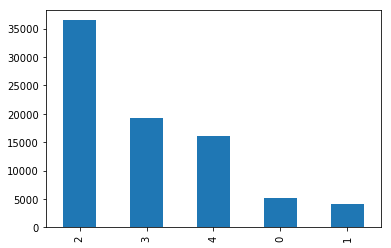

In [54]:
coords.cls.value_counts().plot(kind='bar')
plt.show()

41
(992, 3218)
41
(1237, 3487)
41
(1246, 3058)
41
(1329, 3429)


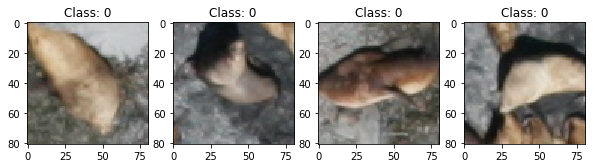

42
(317, 4877)
42
(466, 4274)
42
(1511, 4338)
42
(1625, 4456)


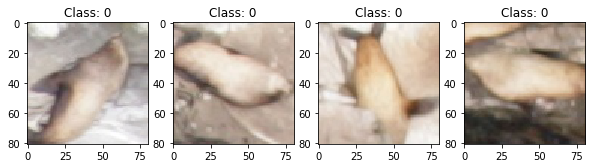

43
(1002, 2725)
43
(1060, 2528)
43
(1288, 2258)
43
(1366, 2862)


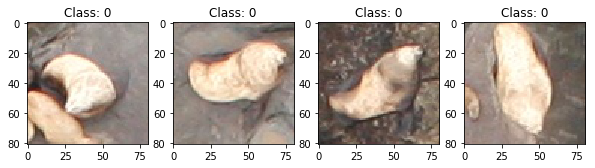

44
(1494, 3068)
44
(1866, 3599)
44
(2144, 3360)
44
(1240, 2950)


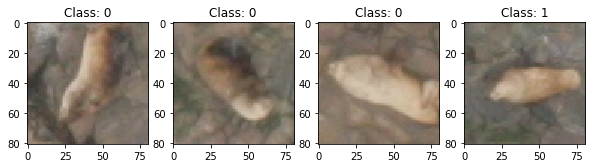

45
(1068, 2519)
45
(1423, 2546)
45
(2048, 2108)
45
(3200, 2633)


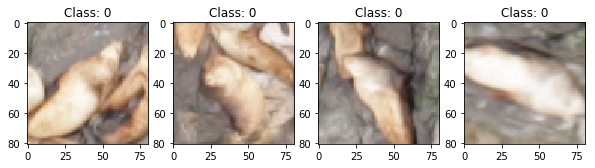

46
(1338, 5418)
46
(1329, 5492)
46
(1432, 5569)
46
(1485, 5599)


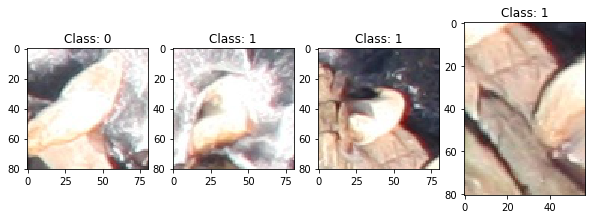

47
(1020, 1931)
47
(1361, 2764)
47
(1416, 3547)
47
(1483, 1027)


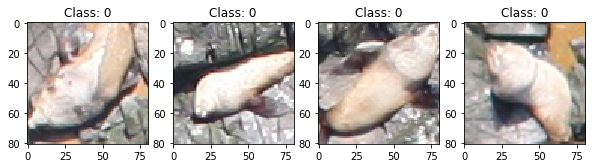

48
(1332, 3448)
48
(1376, 4126)
48
(2052, 3434)
48
(2267, 3761)


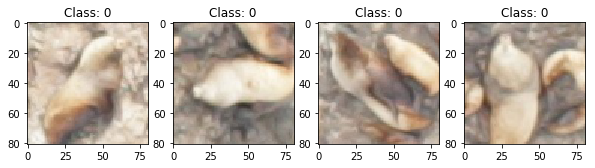

49
(2033, 642)
49
(2065, 1015)
49
(2148, 909)
49
(2201, 736)


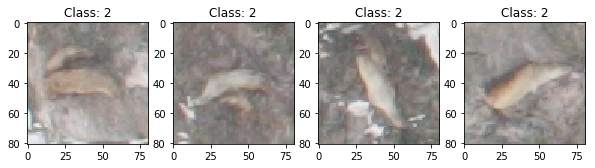

50
(2306, 3682)


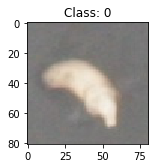

In [48]:
for i, img_id in enumerate(ids):
    c = coords[coords['tid']==img_id]
    classes = c['cls'].as_matrix()
    x = c['row'].as_matrix()
    y = c['col'].as_matrix()
    plt.figure(figsize=(10,20))
    for j in range(np.minimum(x.shape[0],4)):
        print(img_id)
        print(x[j],y[j])
        ax = plt.subplot(1,4,j+1)
        ax.set_title("Class: {}".format(classes[j]))
        plt.imshow(np.array(images[i])[x[j]-40:x[j]+41,y[j]-40:y[j]+41])
    plt.show()